In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_json("Video_Games_5.json", lines=True)

In [4]:
df_sample = df.sample(n=100_000, random_state=42)

In [5]:
print(df_sample.head())

            reviewerID        asin           reviewerName   helpful  \
168500  A17M1HL6U2GS7M  B0047TLIBU             Storylover  [31, 43]   
189019  A1FGU7F9UJ264N  B0053BCP40          Kelly Randall    [0, 0]   
94086   A3R7M2EP1EYNVT  B000WCQWR6  Thomas B. Hileman Jr.    [0, 0]   
168763  A369KP0JV77JYT  B00498T500                    Jon    [4, 4]   
17314     ABIKTKAWOMY8  B00005BIG7          Chance Farley    [3, 3]   

                                               reviewText  overall  \
168500  Been playing this for two days now, and I am v...        5   
189019  I really enjoyed playing this game, although i...        4   
94086   This was kind of a gamble and was looking for ...        3   
168763  ***Updated 7/7/2011 - update marked below***I ...        4   
17314   It looks like we've come a long way from past ...        5   

                                                  summary  unixReviewTime  \
168500  It feels like hanging out with old friends aga...      1299715200  

C:\Users\jackw\AppData\Local\Temp\ipykernel_16580\4108464368.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="overall", data=df, palette="crest")


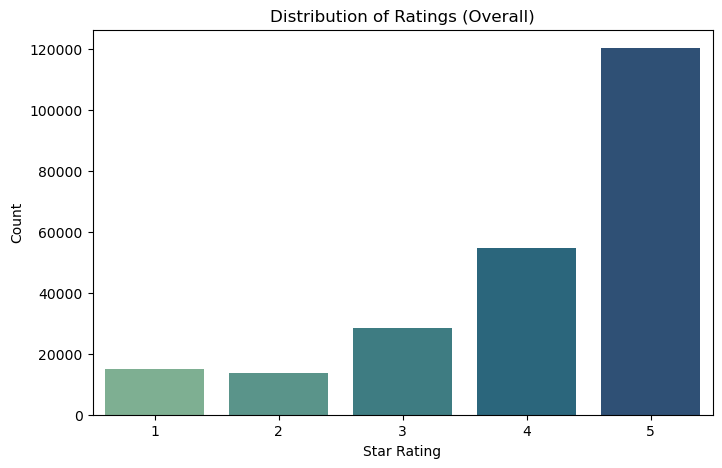

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(x="overall", data=df, palette="crest")
plt.title("Distribution of Ratings (Overall)")
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.savefig("figures/rate_dist.png",dpi=300)
plt.show()

#Expect strong skew toward 4–5stars → motivates stratified sampling or class weighting.


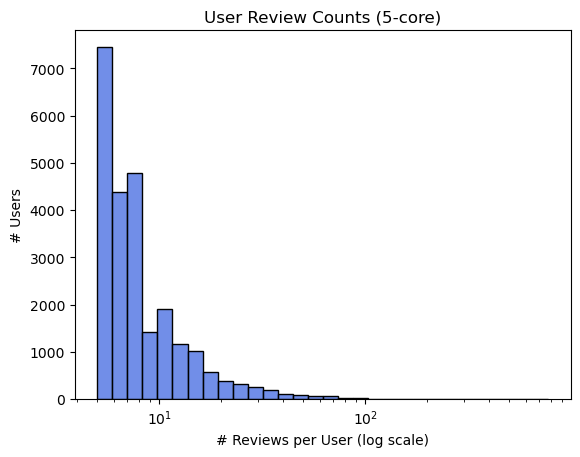

In [8]:
review_counts = df['reviewerID'].value_counts()
sns.histplot(review_counts, bins=30, log_scale=True, color="royalblue")
plt.title("User Review Counts (5-core)")
plt.xlabel("# Reviews per User (log scale)")
plt.ylabel("# Users")
plt.show()

Missing Value Percentage by Column:
 reviewerName      1.21
reviewerID        0.00
asin              0.00
helpful           0.00
reviewText        0.00
overall           0.00
summary           0.00
unixReviewTime    0.00
reviewTime        0.00
dtype: float64


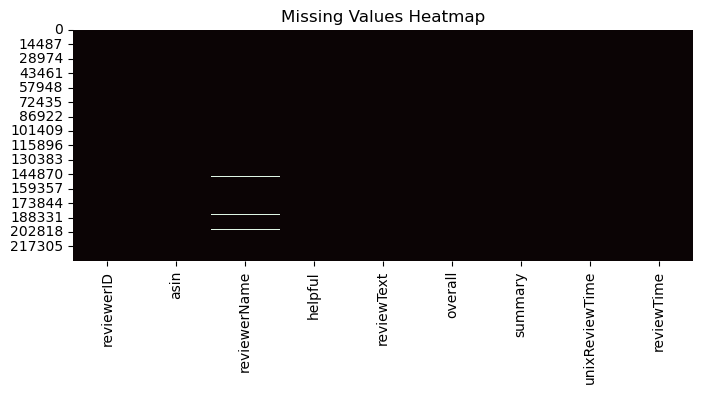

In [9]:
missing_pct = df.isna().mean().sort_values(ascending=False) * 100
print("Missing Value Percentage by Column:\n", missing_pct.round(2))

plt.figure(figsize=(8, 3))
sns.heatmap(df.isna(), cbar=False, cmap="mako")
plt.title("Missing Values Heatmap")
plt.show()

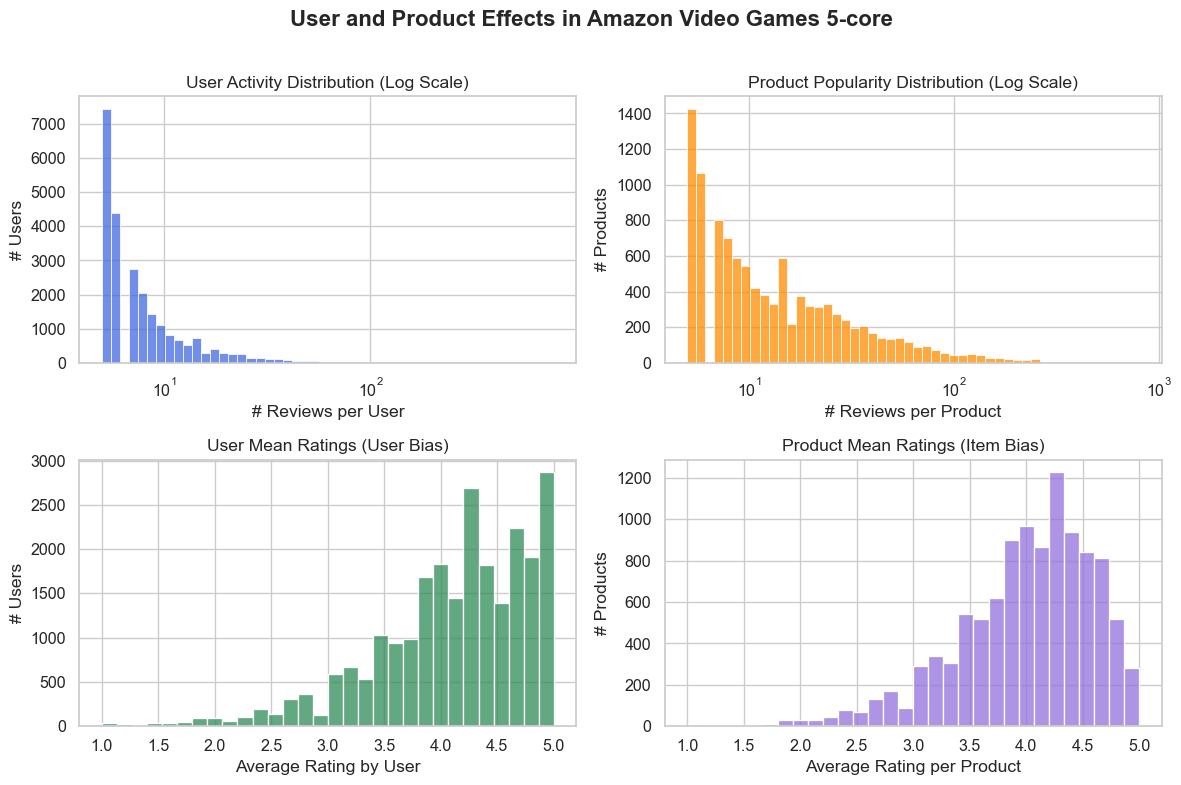

Users: 24,303, Avg reviews/user = 9.54, Median = 7.0
Products: 10,672, Avg reviews/product = 21.72, Median = 11.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", font_scale=1.05)
plt.rcParams["figure.figsize"] = (12, 8)

user_counts = df["reviewerID"].value_counts()
item_counts = df["asin"].value_counts()
user_mean_rating = df.groupby("reviewerID")["overall"].mean()
item_mean_rating = df.groupby("asin")["overall"].mean()
fig, axes = plt.subplots(2, 2)
fig.suptitle("User and Product Effects in Amazon Video Games 5-core", fontsize=16, weight="bold")

# User activity (log-scale)
sns.histplot(user_counts, bins=50, log_scale=True, color="royalblue", ax=axes[0,0])
axes[0,0].set_title("User Activity Distribution (Log Scale)")
axes[0,0].set_xlabel("# Reviews per User")
axes[0,0].set_ylabel("# Users")

# Product popularity (log-scale)
sns.histplot(item_counts, bins=50, log_scale=True, color="darkorange", ax=axes[0,1])
axes[0,1].set_title("Product Popularity Distribution (Log Scale)")
axes[0,1].set_xlabel("# Reviews per Product")
axes[0,1].set_ylabel("# Products")

#User mean rating (user bias)
sns.histplot(user_mean_rating, bins=30, color="seagreen", ax=axes[1,0])
axes[1,0].set_title("User Mean Ratings (User Bias)")
axes[1,0].set_xlabel("Average Rating by User")
axes[1,0].set_ylabel("# Users")

#Product mean rating (item bias)
sns.histplot(item_mean_rating, bins=30, color="mediumpurple", ax=axes[1,1])
axes[1,1].set_title("Product Mean Ratings (Item Bias)")
axes[1,1].set_xlabel("Average Rating per Product")
axes[1,1].set_ylabel("# Products")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# --- Optional quick stats for notes ---
print(f"Users: {len(user_counts):,}, Avg reviews/user = {user_counts.mean():.2f}, Median = {user_counts.median()}")
print(f"Products: {len(item_counts):,}, Avg reviews/product = {item_counts.mean():.2f}, Median = {item_counts.median()}")


C:\Users\jackw\AppData\Local\Temp\ipykernel_22960\3468306190.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="overall", y="helpful_ratio", data=helpful_by_rating, palette="coolwarm")


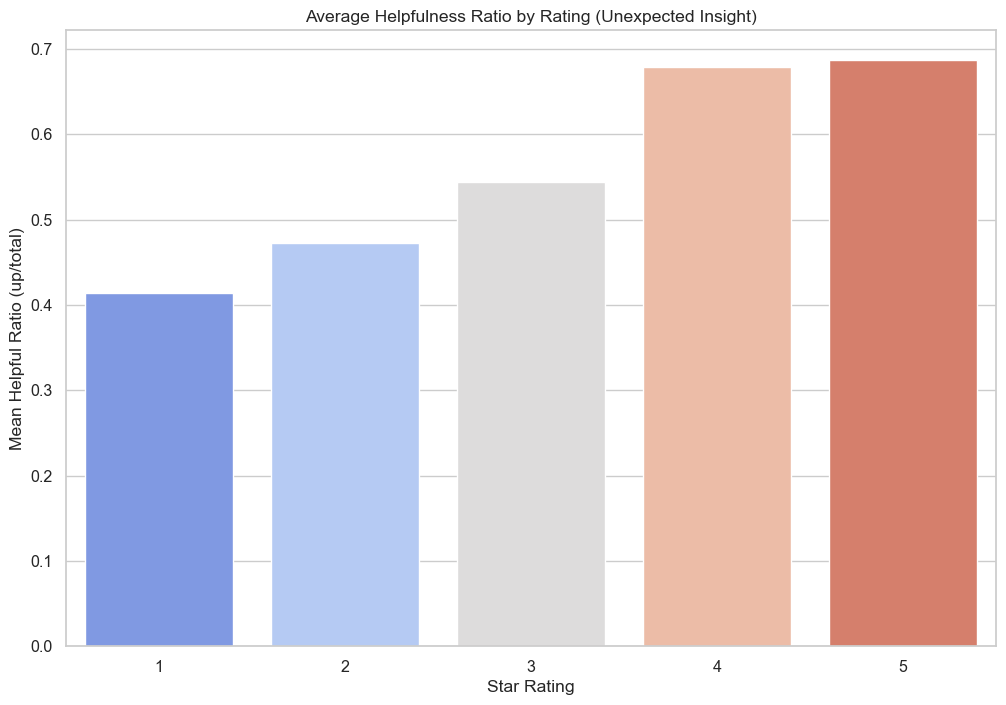

   overall  helpful_ratio
0        1       0.413747
1        2       0.472496
2        3       0.543983
3        4       0.678378
4        5       0.687608


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def helpful_ratio(x):
    try:
        up, total = x
        return up / total if total > 0 else np.nan
    except:
        return np.nan

df["helpful_ratio"] = df["helpful"].apply(helpful_ratio)
df["helpful_total"] = df["helpful"].apply(lambda x: x[1] if isinstance(x, list) else 0)
helpful_by_rating = df.groupby("overall")["helpful_ratio"].mean().reset_index()


sns.barplot(x="overall", y="helpful_ratio", data=helpful_by_rating, palette="coolwarm")
plt.title("Average Helpfulness Ratio by Rating (Unexpected Insight)")
plt.xlabel("Star Rating")
plt.ylabel("Mean Helpful Ratio (up/total)")
plt.show()

print(helpful_by_rating)


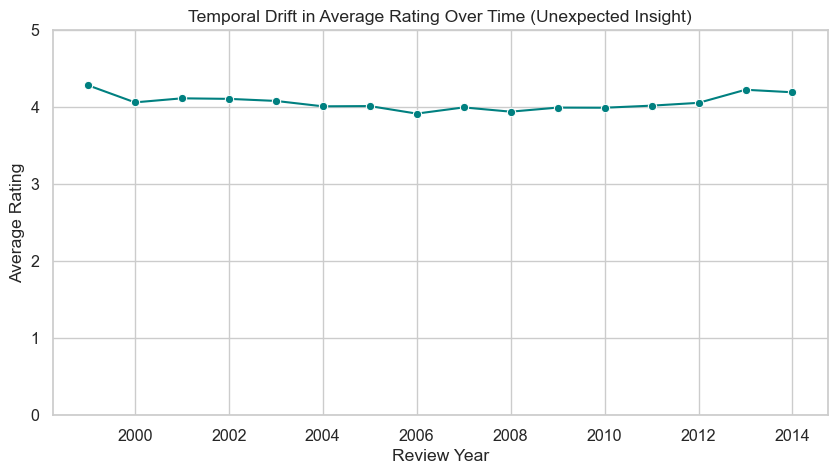

    review_year   overall
0          1999  4.285714
1          2000  4.063364
2          2001  4.115907
3          2002  4.108892
4          2003  4.082116
5          2004  4.012098
6          2005  4.015210
7          2006  3.917354
8          2007  3.997920
9          2008  3.942561
10         2009  3.995481
11         2010  3.993882
12         2011  4.020745
13         2012  4.057213
14         2013  4.227125
15         2014  4.194448


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font_scale=1.05)
plt.rcParams["figure.figsize"] = (10, 5)

# Convert Unix timestamp to datetime
df["review_year"] = pd.to_datetime(df["unixReviewTime"], unit="s").dt.year
yearly_rating = df.groupby("review_year")["overall"].mean().reset_index()

sns.lineplot(x="review_year", y="overall", data=yearly_rating, marker="o", color="teal")
plt.title("Temporal Drift in Average Rating Over Time (Unexpected Insight)")
plt.xlabel("Review Year")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.show()

print(yearly_rating)


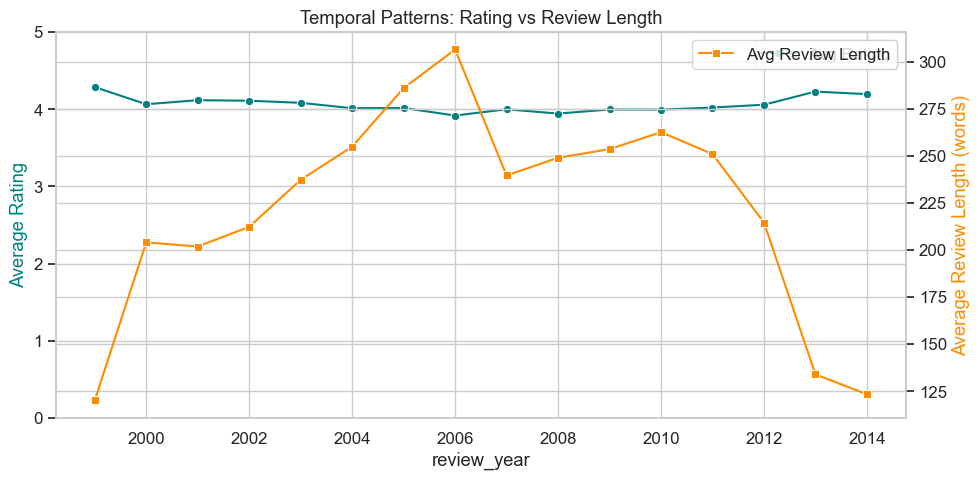

In [19]:
df["review_length"] = df["reviewText"].apply(lambda s: len(str(s).split()))
yearly_behavior = df.groupby("review_year").agg(
    avg_rating=("overall", "mean"),
    avg_length=("review_length", "mean")
).reset_index()

fig, ax1 = plt.subplots()
sns.lineplot(x="review_year", y="avg_rating", data=yearly_behavior,
             marker="o", color="teal", label="Avg Rating", ax=ax1)
ax1.set_ylabel("Average Rating", color="teal")
ax1.set_ylim(0, 5)

ax2 = ax1.twinx()
sns.lineplot(x="review_year", y="avg_length", data=yearly_behavior,
             marker="s", color="darkorange", label="Avg Review Length", ax=ax2)
ax2.set_ylabel("Average Review Length (words)", color="darkorange")

plt.title("Temporal Patterns: Rating vs Review Length")
plt.tight_layout()
plt.show()


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

sns.set(style="whitegrid", font_scale=1.05)
plt.rcParams["figure.figsize"] = (10, 5)

# --- Basic derived text features ---
df["review_length"] = df["reviewText"].apply(lambda s: len(str(s).split()))
df["exclam_ratio"]  = df["reviewText"].apply(lambda s: s.count("!") / len(str(s)) if isinstance(s, str) and len(s) > 0 else 0)
df["question_ratio"]= df["reviewText"].apply(lambda s: s.count("?") / len(str(s)) if isinstance(s, str) and len(s) > 0 else 0)

# --- Sentiment polarity ---
df["sentiment"] = df["reviewText"].apply(lambda s: TextBlob(str(s)).sentiment.polarity if isinstance(s, str) else 0)


C:\Users\jackw\AppData\Local\Temp\ipykernel_22960\812914741.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="overall", y="review_length", data=df, ax=axes[0], showfliers=False, palette="Blues")
C:\Users\jackw\AppData\Local\Temp\ipykernel_22960\812914741.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="overall", y="sentiment", data=df, ax=axes[1], showfliers=False, palette="coolwarm")


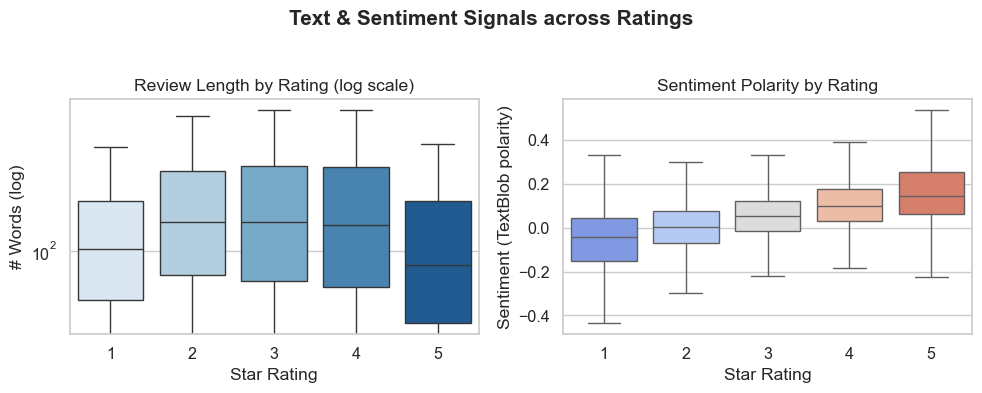

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

#Review length vs rating
sns.boxplot(x="overall", y="review_length", data=df, ax=axes[0], showfliers=False, palette="Blues")
axes[0].set_yscale("log")
axes[0].set_title("Review Length by Rating (log scale)")
axes[0].set_xlabel("Star Rating")
axes[0].set_ylabel("# Words (log)")

#Sentiment polarity vs rating
sns.boxplot(x="overall", y="sentiment", data=df, ax=axes[1], showfliers=False, palette="coolwarm")
axes[1].set_title("Sentiment Polarity by Rating")
axes[1].set_xlabel("Star Rating")
axes[1].set_ylabel("Sentiment (TextBlob polarity)")


plt.suptitle("Text & Sentiment Signals across Ratings", fontsize=15, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GroupShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer


df = df.copy()
df["label"] = (df["overall"] >= 4).astype(int)

def helpful_ratio(x):
    try:
        up, tot = x
        return up / tot if tot > 0 else np.nan
    except:  # bad/missing format
        return np.nan

df["helpful_total"] = df["helpful"].apply(lambda x: x[1] if isinstance(x, list) else np.nan)
df["helpful_ratio"] = df["helpful"].apply(helpful_ratio)

ts = pd.to_datetime(df["unixReviewTime"], unit="s")
df["year"]  = ts.dt.year
df["month"] = ts.dt.month
df["dow"]   = ts.dt.dayofweek

#user-aware: prevents leakage
gss = GroupShuffleSplit(n_splits=1, test_size=0.40, random_state=42)
train_idx, test_idx = next(gss.split(df, groups=df["reviewerID"]))
train_df, test_df = df.iloc[train_idx].copy(), df.iloc[test_idx].copy()

gss2 = GroupShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
val_idx, final_idx = next(gss2.split(test_df, groups=test_df["reviewerID"]))
val_df, final_df = test_df.iloc[val_idx].copy(), test_df.iloc[final_idx].copy()

numeric_cols = [
    "review_length", "exclam_ratio", "question_ratio", "sentiment",
    "helpful_ratio", "helpful_total", "year", "month", "dow"
]
text_col = "reviewText"

# X,y
X_train = train_df[[text_col] + numeric_cols]
y_train = train_df["label"]
X_val   = val_df[[text_col] + numeric_cols]
y_val   = val_df["label"]
X_test  = final_df[[text_col] + numeric_cols]
y_test  = final_df["label"]

# Missing?
row_missing_frac = X_train[numeric_cols].isna().any(axis=1).mean()
col_missing_pct  = X_train[numeric_cols].isna().mean().sort_values(ascending=False) * 100
print(f"[Train] rows with ANY numeric missing: {row_missing_frac*100:.2f}%")
print("[Train] per-column missing %:\n", col_missing_pct.round(2))

# 
numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # handles NaNs robustly
    ("scaler", StandardScaler())                    # normalizes magnitudes
])

text_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        lowercase=True, max_features=10000, ngram_range=(1,2), min_df=5
    ))
])

preproc = ColumnTransformer([
    ("num",  numeric_pipe, numeric_cols),
    ("text", text_pipe, text_col)
], sparse_threshold=0.3)

# Fit on train, transform all
X_train_proc = preproc.fit_transform(X_train)
X_val_proc   = preproc.transform(X_val)
X_test_proc  = preproc.transform(X_test)

print(f"Train rows: {X_train.shape[0]:,} | Val rows: {X_val.shape[0]:,} | Test rows: {X_test.shape[0]:,}")
print(f"Features BEFORE: {len(numeric_cols)+1} (1 text + {len(numeric_cols)} numeric)")
print(f"Features AFTER  : {X_train_proc.shape[1]:,} (TF-IDF + scaled numeric)")


[Train] rows with ANY numeric missing: 39.85%
[Train] per-column missing %:
 helpful_ratio     39.85
review_length      0.00
exclam_ratio       0.00
question_ratio     0.00
sentiment          0.00
helpful_total      0.00
year               0.00
month              0.00
dow                0.00
dtype: float64
Train rows: 140,329 | Val rows: 45,753 | Test rows: 45,698
Features BEFORE: 10 (1 text + 9 numeric)
Features AFTER  : 10,009 (TF-IDF + scaled numeric)
